# Credpay Finances Business solutions

## 1.0 Libraries and Functions

### 1.1 Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Encoding and scaling data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# Modeling Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Model performance metrics
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

### 1.2 Functions

In [2]:
# Themes for Jupyter
!jt -t monokai -cellw 95%
# settings better dataframe and charts visualizations 
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    pd.set_option('display.expand_frame_repr', False)
        
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 2.0 Data Extraction

In [3]:
# Using kaggle API for download dataset
!kaggle datasets download -d laotse/credit-risk-dataset
# Extracting file from zip
!unzip credit-risk-dataset.zip 
# creating folder dataset and copy to folder the csv file
!mkdir dataset & !cp credit_risk_dataset.csv dataset/

100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 2.00MB/s]
100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 1.99MB/s]
Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  
/bin/bash: !cp: command not found
mkdir: cannot create directory ‘dataset’: File exists


In [3]:
# loading data as stage dataframe
base_credit = pd.read_csv('dataset/credit_risk_dataset.csv')

## 3.0 Descriptive Analysis

### 3.1 Data Dimention

In [10]:
# Dimension
base_credit.shape

(32581, 12)

### 3.2 NaN

In [6]:
base_credit.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

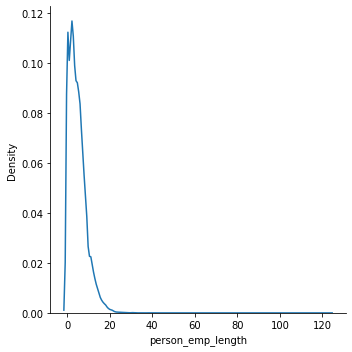

In [41]:
sns.displot(base_credit['person_emp_length'], kind='kde');

In [4]:
base_credit['person_emp_length'] = base_credit['person_emp_length'].fillna(
                                    base_credit['person_emp_length'].mean())

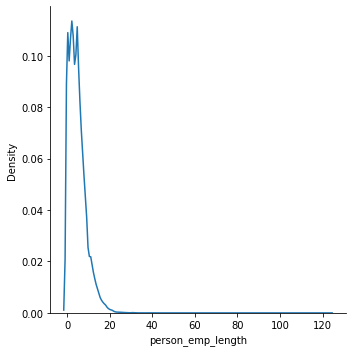

In [7]:
sns.displot(base_credit['person_emp_length'], kind='kde');

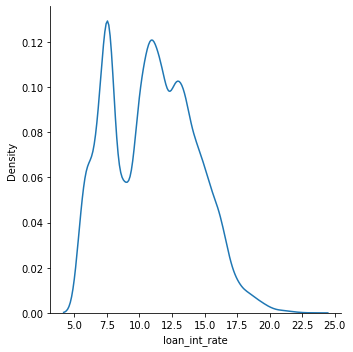

In [35]:
# Visualizing distribution and see if it will better replace per mean or median or zero
sns.displot(base_credit['loan_int_rate'], kind='kde');

In [5]:
base_credit['loan_int_rate'] = base_credit['loan_int_rate'].fillna(
    base_credit['loan_int_rate'].mean())

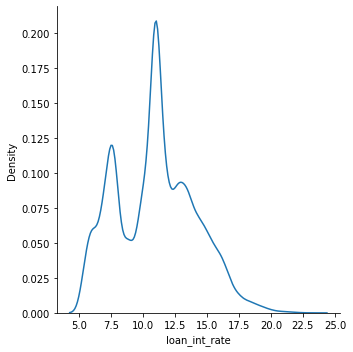

In [8]:
sns.displot(base_credit['loan_int_rate'], kind='kde');

In [9]:
base_credit.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 3.3 DataType

In [11]:
base_credit[base_credit['person_income'] >= base_credit['person_income'].max()]

person_age  person_income person_home_ownership  person_emp_length  \
32297         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32297    PERSONAL          C       5000          12.73            0   

       loan_percent_income cb_person_default_on_file  \
32297                  0.0                         N   

       cb_person_cred_hist_length  
32297                          25

In [12]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
base_credit.tail()

person_age  person_income person_home_ownership  person_emp_length      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length
32576          57          53000              MORTGAGE                1.0         PERSONAL          C       5800          13.16            0                 0.11                         N                          30
32577          54         120000              MORTGAGE                4.0         PERSONAL          A      17625           7.49            0                 0.15                         N                          19
32578          65          76000                  RENT                3.0  HOMEIMPROVEMENT          B      35000          10.99            1                 0.46                         N                          28
32579          56         150000              MORTGAGE                5.0         PERSONAL          B      15000          11.48            0                 0.10                         N                          26
32580          66          42000                  RENT                2.0          MEDICAL          B       6475           9.99            0                 0.15                         N                          30

In [7]:
base_credit['person_income'] = base_credit['person_income'].astype('float64').copy()
base_credit['loan_amnt'] = base_credit['loan_amnt'].astype('float64').copy()

In [16]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 3.0+ MB


### 3.4 Descriptive Statistics First Level

In [7]:
base_credit.describe(include='all').T

count unique        top   freq         mean           std     min      25%        50%      75%        max
person_age                  32581.0    NaN        NaN    NaN      27.7346      6.348078    20.0     23.0       26.0     30.0      144.0
person_income               32581.0    NaN        NaN    NaN  66074.84847  61983.119168  4000.0  38500.0    55000.0  79200.0  6000000.0
person_home_ownership         32581      4       RENT  16446          NaN           NaN     NaN      NaN        NaN      NaN        NaN
person_emp_length           32581.0    NaN        NaN    NaN     4.789686      4.085333     0.0      2.0        4.0      7.0      123.0
loan_intent                   32581      6  EDUCATION   6453          NaN           NaN     NaN      NaN        NaN      NaN        NaN
loan_grade                    32581      7          A  10777          NaN           NaN     NaN      NaN        NaN      NaN        NaN
loan_amnt                   32581.0    NaN        NaN    NaN  9589.371106   6322.086646   500.0   5000.0     8000.0  12200.0    35000.0
loan_int_rate               32581.0    NaN        NaN    NaN    11.011695      3.081605    5.42     8.49  11.011695    13.11      23.22
loan_status                 32581.0    NaN        NaN    NaN     0.218164      0.413006     0.0      0.0        0.0      0.0        1.0
loan_percent_income         32581.0    NaN        NaN    NaN     0.170203      0.106782     0.0     0.09       0.15     0.23       0.83
cb_person_default_on_file     32581      2          N  26836          NaN           NaN     NaN      NaN        NaN      NaN        NaN
cb_person_cred_hist_length  32581.0    NaN        NaN    NaN     5.804211      4.055001     2.0      3.0        4.0      8.0       30.0

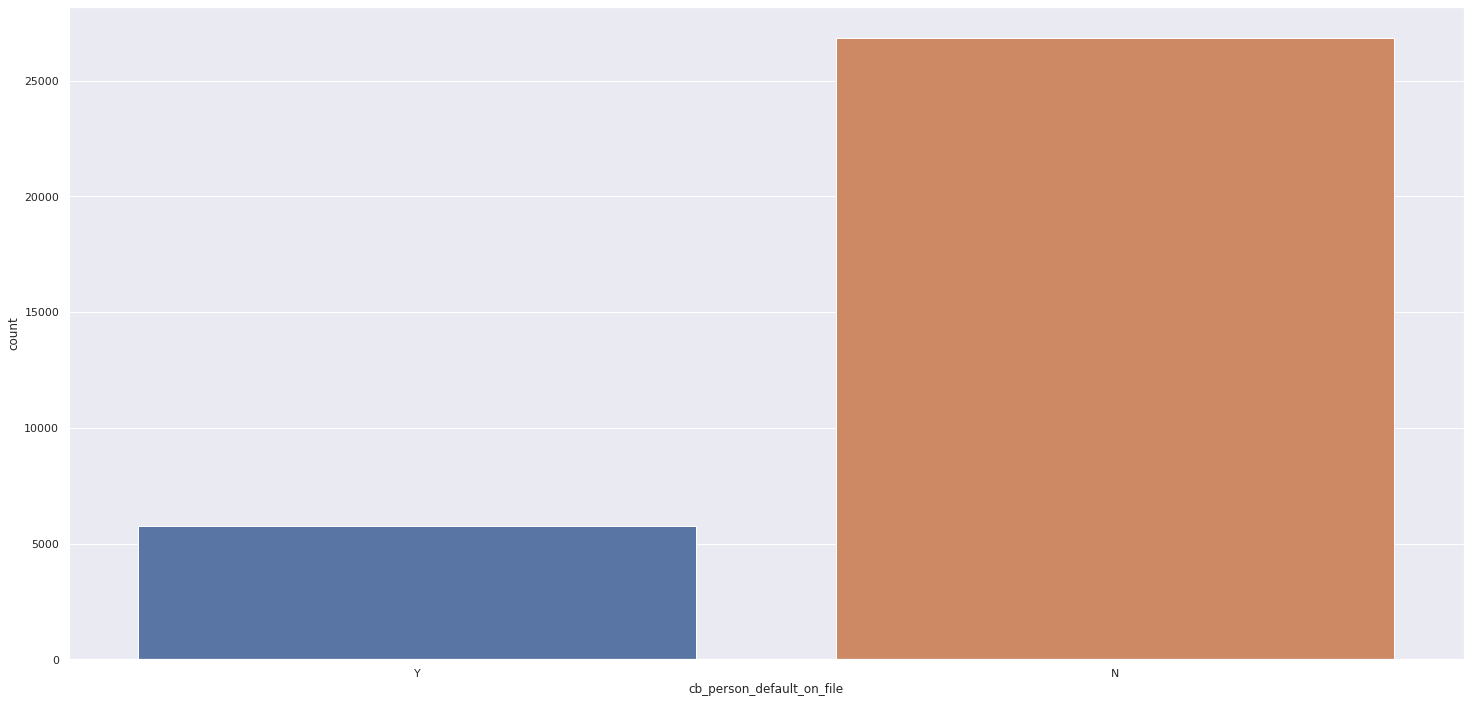

In [61]:
sns.countplot(data = base_credit, x='cb_person_default_on_file');

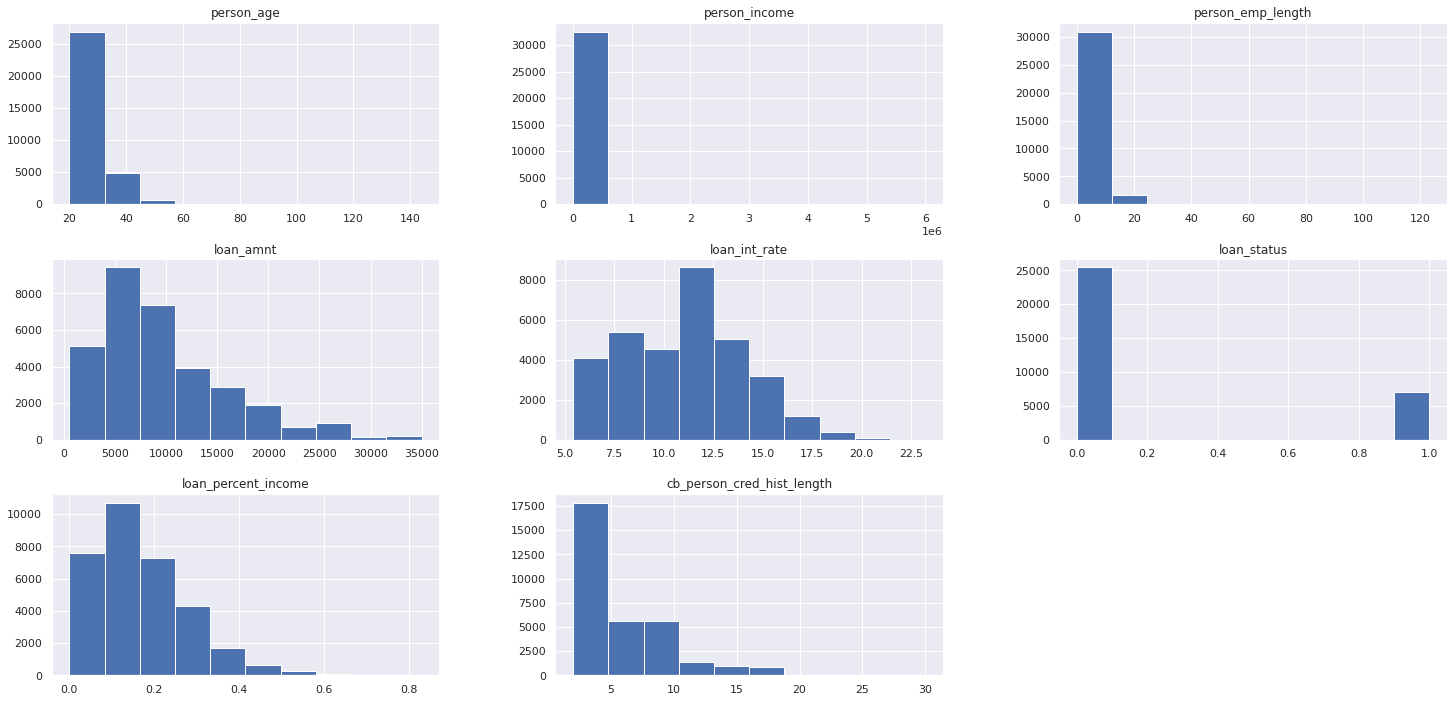

In [62]:
base_credit.hist();

In [7]:
ax = base_credit[['person_age', 'person_income', 'loan_amnt', 'cb_person_default_on_file']].copy()
ax['cb_person_default_on_file'] = ax['cb_person_default_on_file'].map({'Y':1, 'N':0}).copy()

In [8]:
chart = px.scatter_matrix(ax, dimensions=['person_age', 'person_income'], 
                          color='cb_person_default_on_file')
chart.show()

#### 3.4.1 Inconsistence 

In [15]:
base_credit.describe().T

count          mean           std      min       25%           50%       75%         max
person_age                  32581.0     27.734600      6.348078    20.00     23.00     26.000000     30.00      144.00
person_income               32581.0  66074.848470  61983.119168  4000.00  38500.00  55000.000000  79200.00  6000000.00
person_emp_length           32581.0      4.789686      4.085333     0.00      2.00      4.000000      7.00      123.00
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   5000.00   8000.000000  12200.00    35000.00
loan_int_rate               32581.0     11.011695      3.081605     5.42      8.49     11.011695     13.11       23.22
loan_status                 32581.0      0.218164      0.413006     0.00      0.00      0.000000      0.00        1.00
loan_percent_income         32581.0      0.170203      0.106782     0.00      0.09      0.150000      0.23        0.83
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00      3.00      4.000000      8.00       30.00

- Probablly the above then 2 milions of income has incorrect, but if the person was a company, it's possible.
- Probablly the age above the 100 it's incorrect, may delete this register will be better
> I will left this asks for the next cycle

## 4.0 Exploratory Data Analysis

### 4.1 Hyphotesis asks

- It's supposed to older people has a less risk
- It's supposed to how much more income less risk
- It's supposed to how much less the percentual income of the ammount load less risk
- It's supposed to how much more old with more income less risk

### 4.2 Hypothesis answers

- The next cycle

## 5.0 Models

### 5.1 Scaling and splitting

In [3]:
# exporting base to continue without run the cell above
# base_credit.to_csv('base_credit_cleaned.csv')
base_credit = pd.read_csv('base_credit_cleaned.csv')

> Here we are two differents ways to scalling and splitting and more 2 ways of train and test

- This case he encoding all data with label encoder and after the one hot encoder
    - normally I encoding each columns accourdantly of distribution, type of variable and the autliers, I don't know why he teach this way, let's try after

#### 5.1.1 Encoding before spliting

##### 5.1.1.1 Encoding

In [4]:
# Encoding Nominal Categorical data to numeric data
base_credit = pd.get_dummies(data=base_credit, columns=['person_home_ownership'])
base_credit = pd.get_dummies(data=base_credit, columns=['loan_intent'])
# Encoding Ordinal categorical data to numeric order by grade (a, b, c...)
ordinal = OrdinalEncoder()
base_credit['loan_grade'] = ordinal.fit_transform(base_credit['loan_grade'].to_numpy().reshape(-1,1))
# Encoding target to binary data like label Encoder
base_credit['cb_person_default_on_file'] = base_credit['cb_person_default_on_file'].map({'N':0, 'Y':1})

##### 5.1.1.2 Spliting

In [5]:
# Spliting and converting to numpy array
x_credit = base_credit.drop(['cb_person_default_on_file', 'Unnamed: 0'], axis=1).values
y_credit = base_credit['cb_person_default_on_file'].values

# Scaling
st = StandardScaler()
x_credit = st.fit_transform(x_credit)

In [6]:
# Train, Validation and Test
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_credit, y_credit, test_size=0.10, random_state=42)

### 5.2 Modeling

#### 5.2.1 Random Forest

In [58]:
model_rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model_rfc.fit(x_train, y_train)

predict_class = model_rfc.predict(x_valid)

In [59]:
print(classification_report(y_valid, predict_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2678
           1       0.51      0.50      0.51       581

    accuracy                           0.83      3259
   macro avg       0.70      0.70      0.70      3259
weighted avg       0.82      0.83      0.82      3259



0.8250997238416692

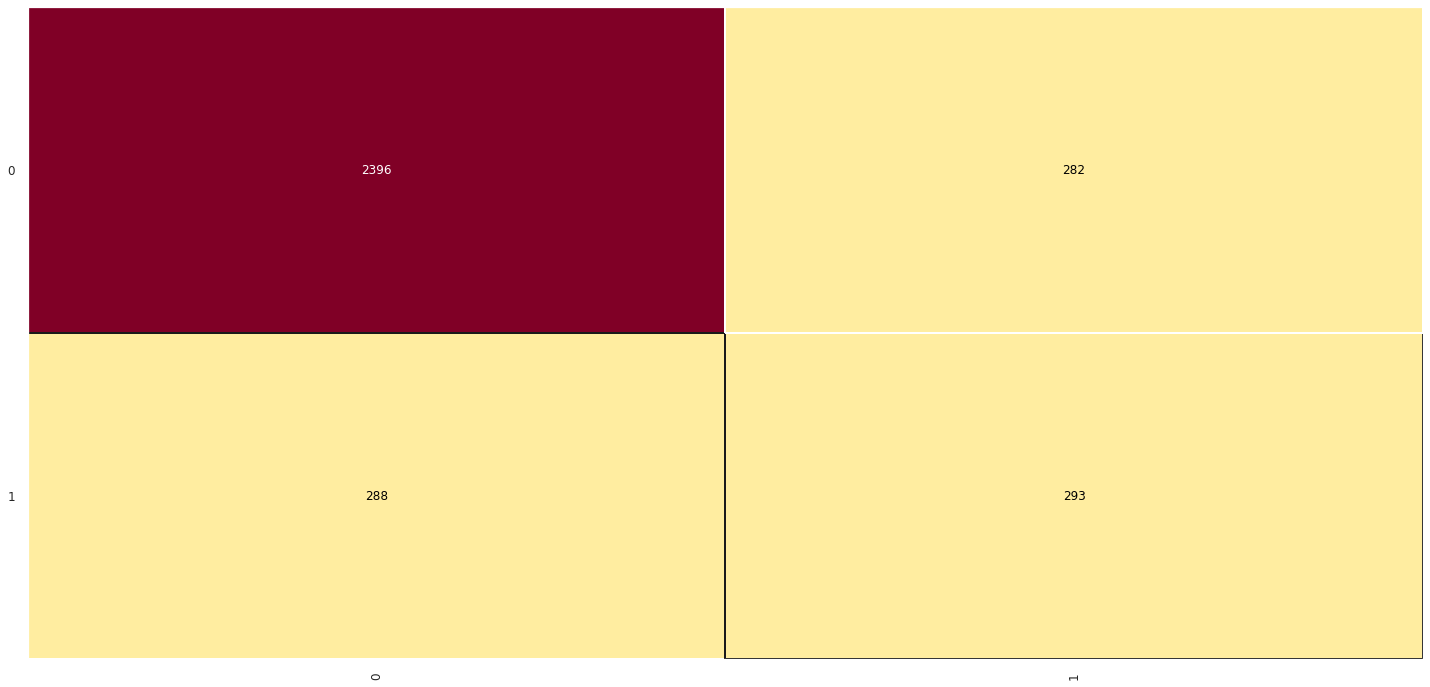

In [67]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model_rfc)
cm.fit(x_train, y_train)
cm.score(x_valid, y_valid)

#### 5.2.2 Naive Bayes

> Naive Bayes run with probability with each variable and multiplier all the features probablity and sum them

In [19]:
from sklearn.naive_bayes import GaussianNB

mdl = GaussianNB()
mdl.fit(x_train, y_train)
y_hat = mdl.predict(x_valid)

print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2678
           1       0.51      0.58      0.54       581

    accuracy                           0.83      3259
   macro avg       0.71      0.73      0.72      3259
weighted avg       0.84      0.83      0.83      3259



0.8260202516109236

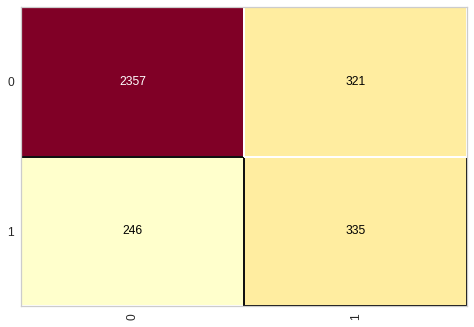

In [33]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(mdl)
cm.fit(x_train, y_train)
cm.score(x_valid, y_valid)

#### 5.2.3 Decision Tree

In [47]:
mdl_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
mdl_tree.fit(x_train, y_train)
y_hat = mdl_tree.predict(x_valid)

In [50]:
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2678
           1       0.51      0.50      0.51       581

    accuracy                           0.83      3259
   macro avg       0.70      0.70      0.70      3259
weighted avg       0.82      0.83      0.82      3259



0.8250997238416692

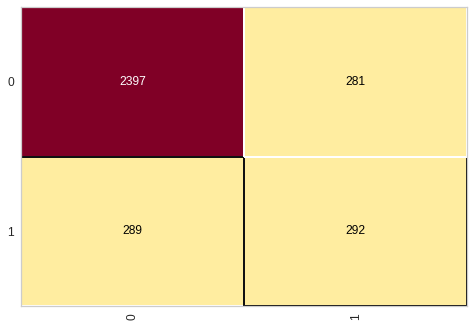

In [52]:
# Confusion matrix to see how many true or false
cm = ConfusionMatrix(mdl_tree)
cm.fit(x_train, y_train)
cm.score(x_valid, y_valid)

<ipython-input-55-e7017cf905ba>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('decision_tree.png', orientation='landscape', quality=95)


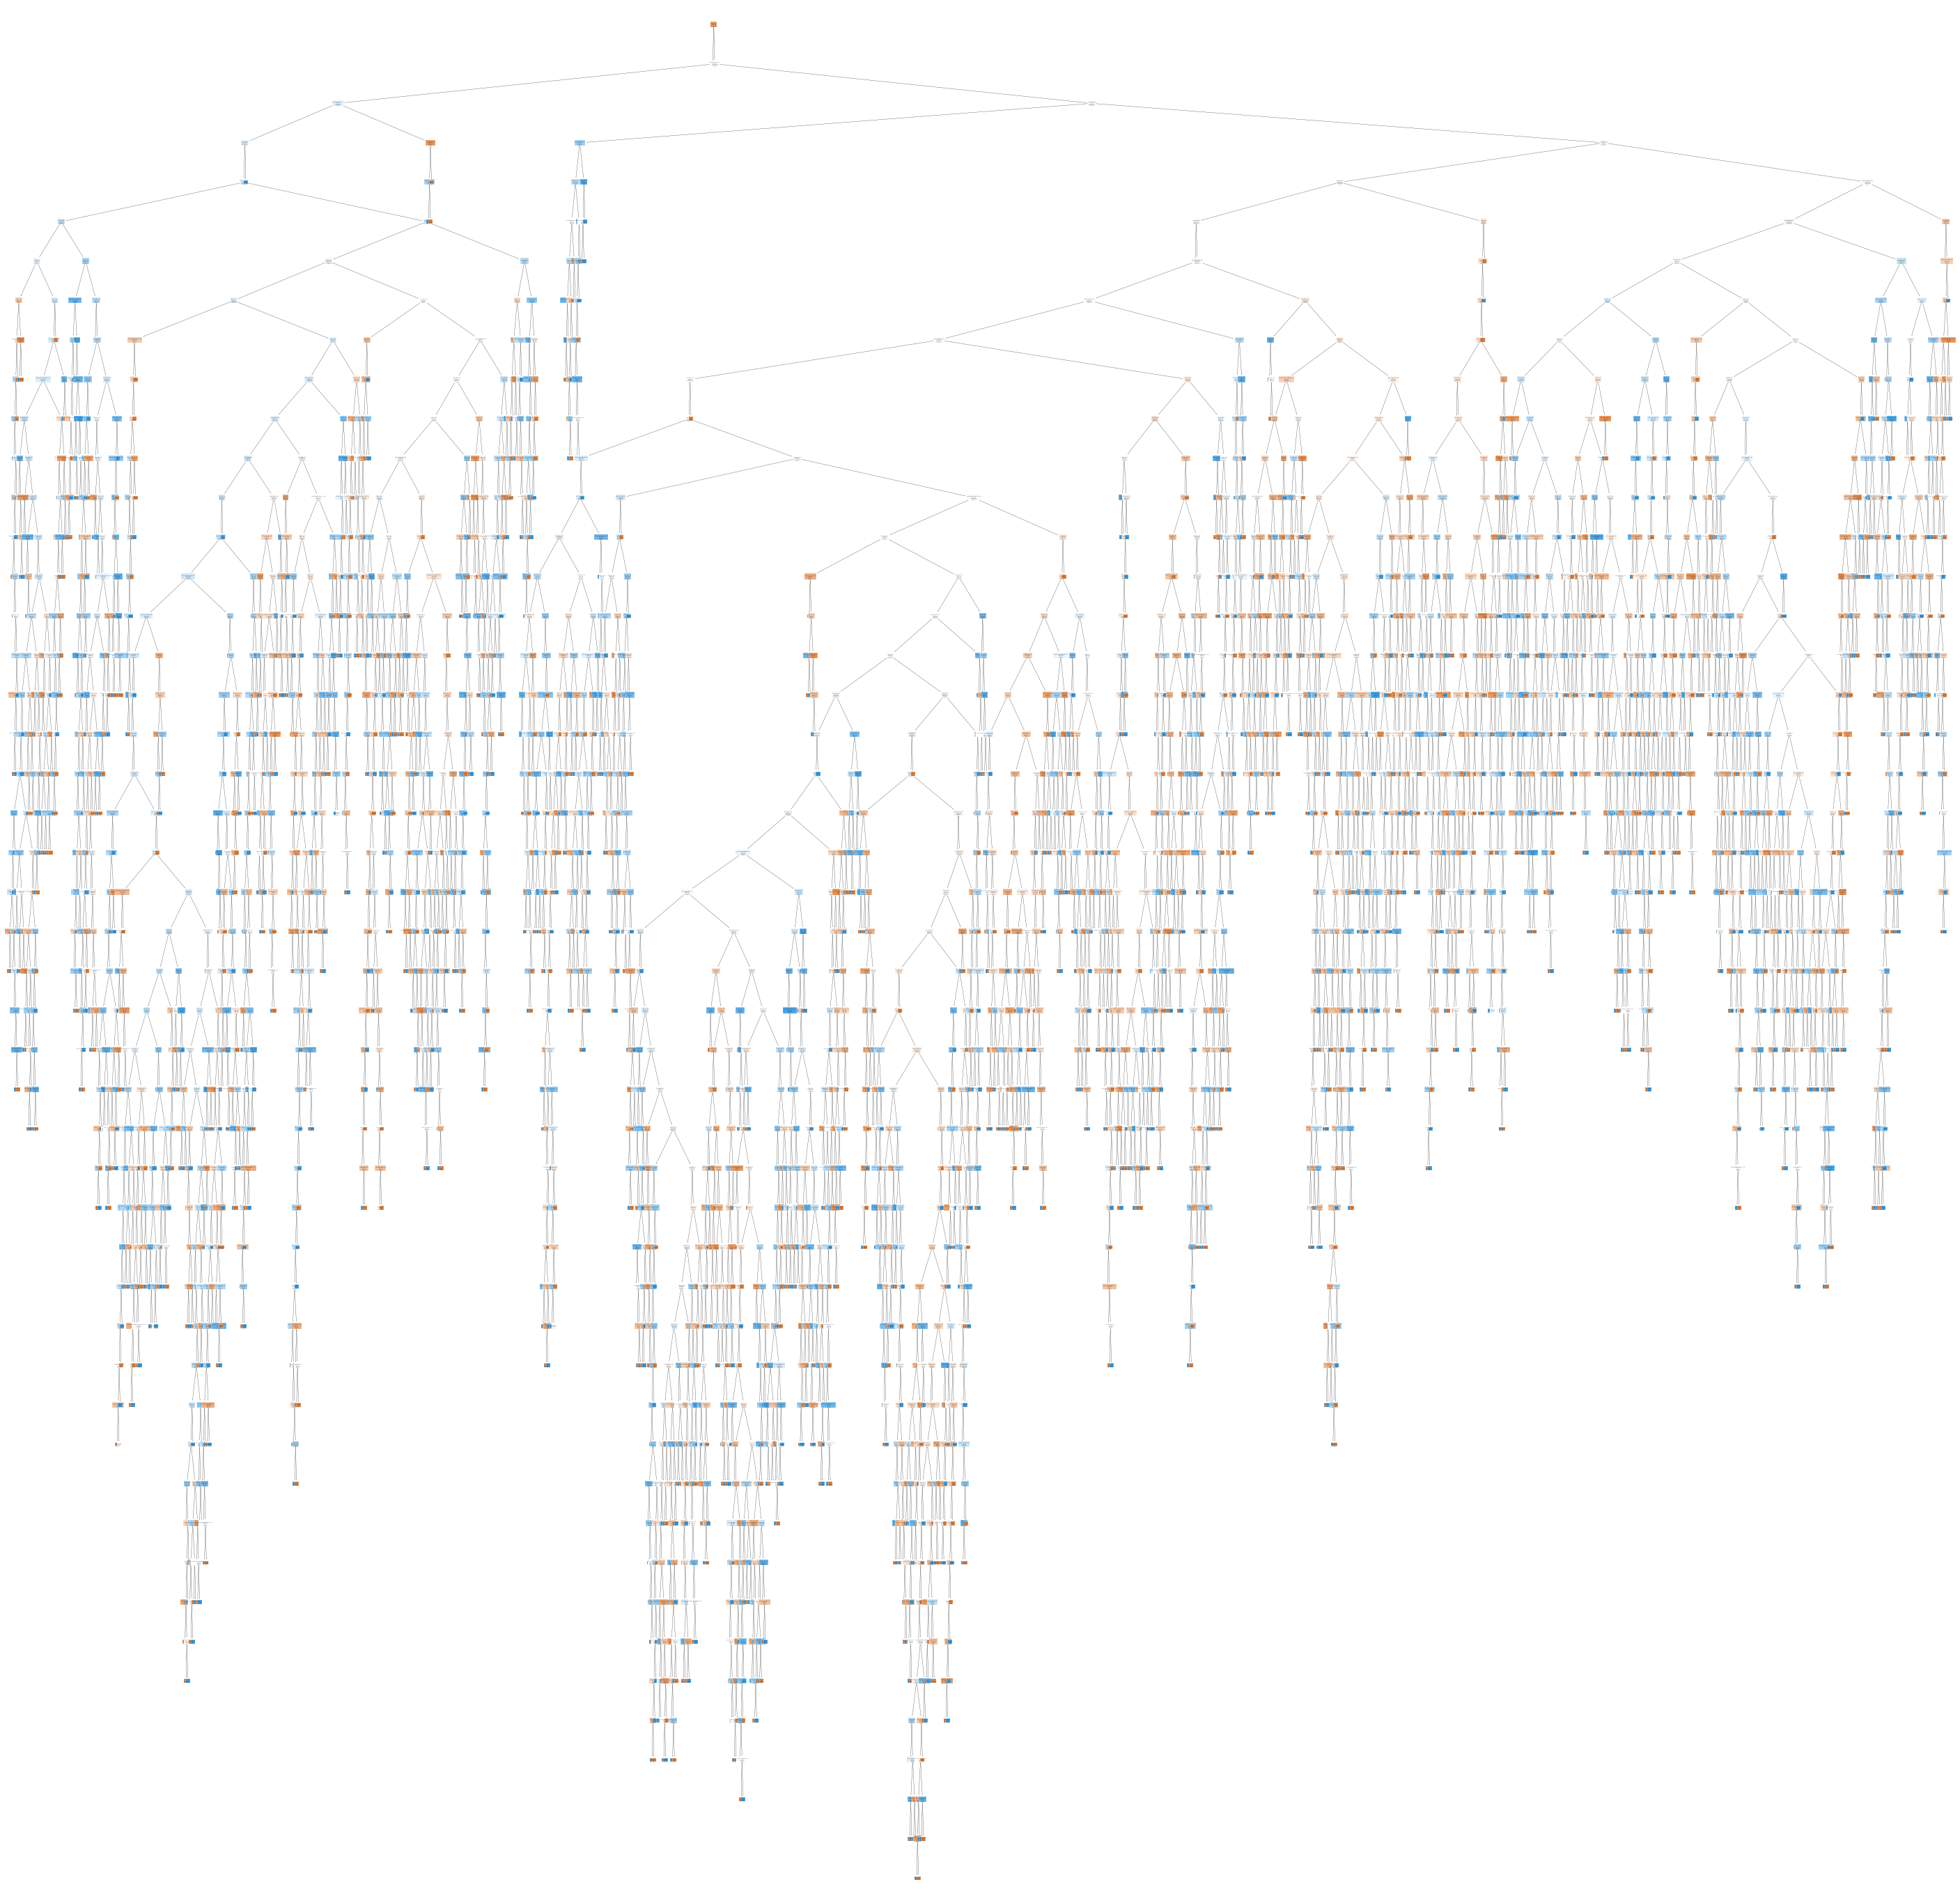

In [55]:
# Decision Tree Image
predictors = ['person_age', 'person_income', 'person_emp_length',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status',
       'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(50,50))
tree.plot_tree(mdl_tree, feature_names=predictors, class_names=str(mdl_tree.classes_), filled=True);
fig.savefig('decision_tree.png', orientation='landscape', quality=95)

#### 5.2.4 Roles induction "Orange"

In [10]:
import Orange

base_credit.tail().T

32576     32577            32578     32579    32580
Unnamed: 0                     32576     32577            32578     32579    32580
person_age                        57        54               65        56       66
person_income                53000.0  120000.0          76000.0  150000.0  42000.0
person_home_ownership       MORTGAGE  MORTGAGE             RENT  MORTGAGE     RENT
person_emp_length                1.0       4.0              3.0       5.0      2.0
loan_intent                 PERSONAL  PERSONAL  HOMEIMPROVEMENT  PERSONAL  MEDICAL
loan_grade                         C         A                B         B        B
loan_amnt                     5800.0   17625.0          35000.0   15000.0   6475.0
loan_int_rate                  13.16      7.49            10.99     11.48     9.99
loan_status                        0         0                1         0        0
loan_percent_income             0.11      0.15             0.46       0.1     0.15
cb_person_default_on_file          N         N                N         N        N
cb_person_cred_hist_length        30        19               28        26       30

In [73]:
#base_credit = base_credit.drop(['Unnamed: 0'], axis=1).copy()
base_credit.columns = ['i#Unnamed: 0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'c#cb_person_default_on_file', 'cb_person_cred_hist_length']

ValueError: Length mismatch: Expected axis has 21 elements, new values have 13 elements

In [29]:
base = Orange.data.Table('base_credit_c#.csv')

In [30]:
base.domain

[Feature 1, person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_cred_hist_length | cb_person_default_on_file]

In [32]:
train_test = Orange.evaluation.testing.sample(base, n=0.10)

In [36]:
x_valid = train_test[0]
x_train = train_test[1]

In [37]:
cn2 = Orange.classification.rules.CN2Learner()
rules_credit = cn2(x_train)

In [44]:
pred = Orange.evaluation.testing.TestOnTestData(x_train, x_valid, [lambda testdata: rules_credit])
Orange.evaluation.CA(pred)

array([0.82842234])

In [48]:
Orange.evaluation.F1(pred)

array([0.52747253])

In [71]:
Orange.evaluation.Recall(pred)

array([0.50485437])

#### 5.2.5 KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)
pred = knn.predict(x_valid)
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2678
           1       0.52      0.49      0.51       581

    accuracy                           0.83      3259
   macro avg       0.70      0.70      0.70      3259
weighted avg       0.82      0.83      0.83      3259



#### All Model Metrics

Model              | recall | f1-> 1 |
-------------------|--------|--------|
Random Forest      | 0.50   | 0.51   |
Naive Bayes        | 0.58   | 0.54   |
Decision tree      | 0.50   | 0.51   |
Rules Learn Orange | 0.50   | 0.53   |
Knn                | 0.49   | 0.51   |

## 6.0 Business Performance

## 7.0 Production

## 8.0 Deployment